In [1]:
import sys
#sys.path.append('/Users/rociokiman/Documents/Gaia-Cupid/ActivityAgeRelation/banyan_sigma')
#from banyan_sigma import banyan_sigma
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from wdwarfdate import calc_wd_age

In [2]:
teff=np.array([20000,10000])
e_teff=np.array([500,100])
logg=np.array([8.0,8.0])
e_logg=np.array([0.2,0.1])
final_mass=np.array([0.6,0.6])
e_final_mass=np.array([0.06,0.01])

total_age_median,total_age_std = calc_wd_age(teff,e_teff,logg,e_logg,final_mass,e_final_mass,n_mc=2000,model_wd='DA',feh='p0.00',vvcrit='0.0')

In [3]:
print(total_age_median,total_age_std)

[2.92777207e+09 4.71686344e+09] [3.83953193e+09 1.12597636e+09]


In [2]:
wd_gold = fits.open('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/Catalogs/gold_gaiawd.fits')
mg_ref = Table.read('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/Catalogs/moving_groups_ref.csv')

In [3]:
ra = wd_gold[1].data['ra']
dec = wd_gold[1].data['dec']
pmra = wd_gold[1].data['pmra']
pmra_error = wd_gold[1].data['pmra_error']
pmdec = wd_gold[1].data['pmdec']
pmdec_error = wd_gold[1].data['pmdec_error']
parallax = wd_gold[1].data['parallax']
parallax_error = wd_gold[1].data['parallax_error']

In [4]:
mask = ((~np.isnan(ra+dec+pmra+pmra_error+pmdec+pmdec_error+parallax+parallax_error))
        * (parallax/parallax_error > 10))

In [5]:
OUTPUT_STRUCTURE = banyan_sigma(ra=ra[mask], dec=dec[mask], 
                                 pmra=pmra[mask], pmdec=pmdec[mask], 
                                 epmra=pmra_error[mask], 
                                 epmdec=pmdec_error[mask], 
                                 plx=parallax[mask], 
                                 eplx=parallax_error[mask])

In [6]:
mg_ref.columns

<TableColumns names=('name','age','age_error','ref_age','group_num','Comment','col6')>

In [7]:
prob_ya_small = np.array(OUTPUT_STRUCTURE['YA_PROB']).reshape(len(OUTPUT_STRUCTURE['YA_PROB']),)
best_ya_small = np.array(OUTPUT_STRUCTURE['BEST_YA']).reshape(len(OUTPUT_STRUCTURE['BEST_YA']),)
mask_group = prob_ya_small > 0.9
age_small = []
for x in best_ya_small[mask_group]:
    mask_mg = x == mg_ref['name']
    age_small.append(mg_ref['age'][mask_mg][0])
    
age_ya = np.array(age_small)*1e6
prob_ya = prob_ya_small[mask_group]

In [8]:
logg = wd_gold[1].data['log_g'][mask][mask_group]
e_logg = wd_gold[1].data['elog_g'][mask][mask_group]
teff = wd_gold[1].data['Teff'][mask][mask_group]
e_teff = wd_gold[1].data['eTeff'][mask][mask_group]
final_mass = wd_gold[1].data['mass'][mask][mask_group]
e_final_mass = wd_gold[1].data['emass'][mask][mask_group]

In [9]:
age_ya[~np.isnan(age_ya)]

array([1.50e+06, 1.50e+06, 4.00e+07, 4.00e+07, 5.62e+08, 5.62e+08,
       1.50e+06])

In [10]:
total_age_median,total_age_std = calc_wd_age(teff,e_teff,logg,e_logg,final_mass,e_final_mass,n_mc=2000,model_wd='DA',
                                             feh='p0.00',vvcrit='0.0')

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [18]:
total_age_median

array([1.81417686e+09,            nan, 3.67454631e+09, 3.67225881e+09,
       5.72644459e+08, 5.72714932e+08, 1.07000091e+16])

In [19]:
final_mass

array([0.755232, 0.339804, 0.788042, 0.788042, 0.886805, 0.886805,
       1.004971])

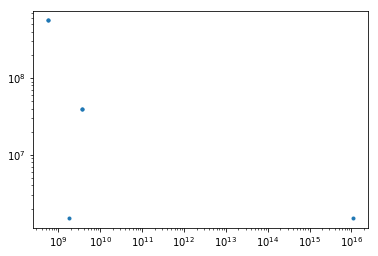

In [17]:
plt.loglog(total_age_median,age_ya,'.')